In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from math import sin, cos

import checker
import utils

## Po co nam ten numpy?
Przydaje nam się z kilku powodów:
* Napisanie jednej linijki w numpy jest szybsze i wygodniejsze niż napisanie pętli, jest też mniejsza szansa, że zrobimy gdzieś po drodze błąd. Oczywiście najpierw trzeba się przyzwyczaić do intefejsu.
* Numpy jest znacznie bardziej wydajny niż napisane przez nas funkcje w "czystym" Pythonie.
* PyTorch, biblioteka do głębokiego uczenia, z której później będziemy korzystać, ma bardzo podobny interfejs.

**Kilka przykładów:**

In [2]:
%%timeit

X = [random.random() for _ in range(10000)]
y = [sin(x) + cos(x) for x in X]

3.81 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%%timeit

X = np.random.random(10000)
y = np.sin(X) + np.cos(X)

472 µs ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def numpy_almost_var(x):
    m = np.mean(x)
    powers = (x - m) ** 4
    return np.mean(powers)

X = np.random.random(10000)

In [5]:
%%timeit
almost_variance(X)

10.2 ms ± 672 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
numpy_almost_var(X)

484 µs ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Zadanie 1 (2 pkt.)
Wykonać poniższe ćwiczenia przy pomocy Numpy:

1. Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz funkcję, która dla zadnego $K$ zwraca tabliczkę mnożenia, tzn. tablicę $A$ taką, że $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,K\}$$
    <img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

    Przydatne funkcje: `np.arange`, `np.reshape`. 

In [2]:
def multiplication_table(K):
    a = np.arange(1,K+1)
    b = np.reshape(a,(-1,1))
    return a*b

print("Wynik funkcji multiplication:\n", multiplication_table(10))
checker.check_multiplication_table(multiplication_table)

Wynik funkcji multiplication:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


In [3]:
a = np.arange(1,9)
#np.reshape(a,(4,-1))
#print(np.shape(a))
#np.reshape(a,(-4,))
#a1 = np.array([[1,2,3,4]])
#print(np.shape(a1))
#b=np.reshape(a1,(-1,1))
#print(b)\
#print(a)
b = np.reshape(a,(-1,1))
#print(b)
print(a*b)


[[ 1  2  3  4  5  6  7  8]
 [ 2  4  6  8 10 12 14 16]
 [ 3  6  9 12 15 18 21 24]
 [ 4  8 12 16 20 24 28 32]
 [ 5 10 15 20 25 30 35 40]
 [ 6 12 18 24 30 36 42 48]
 [ 7 14 21 28 35 42 49 56]
 [ 8 16 24 32 40 48 56 64]]


2. Mając daną tablice jednowymiarową oraz liczbę `x` znajdź najbliższą wartość `x` w `A`, tzn. 
    $$ \mathrm{closest}(x, A) = \arg\min_{a\in A}|x - a|  $$

    Przydatne funkcje: `np.argmin`, `np.abs`. 

In [5]:
def closest(x, A):
    b = np.argmin(np.abs(A-x))
    return A[b]

print("Wynik funkcji closest:", closest(9, np.array([5, 8, 14])))
checker.check_closest(closest)

Wynik funkcji closest: 8


In [4]:
a = np.arange(1,9)
print(a)
x=3
print(a-x)
print(np.abs(a-x))
b=np.abs(a-x)
c=np.argmin(b)
print(c)
#print(np.argmin(b))


[1 2 3 4 5 6 7 8]
[-2 -1  0  1  2  3  4  5]
[2 1 0 1 2 3 4 5]
2


3. Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

    $$
    \mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
    $$

    Potencjalnie przydatne funkcje: `np.cumprod`, `np.concatenate`, `np.sum`.

In [2]:
def poly(x, a):
    a = a[::-1]
    w=0
    j = len(a)-1
    for i in range(len(a)):
        w+= a[i] * x**j
        j = j-1
    return w


print("Wynik funkcji poly:", poly(3, np.array([1, 2, 4]))) #1+6+36=43
checker.check_poly(poly)

Wynik funkcji poly: 43


In [185]:
arr=[1,2,4]
print(len(arr))
reversed_arr = arr[::-1]
print(len(reversed_arr))
a = np.poly1d(reversed_arr)
x = 3
def poly(x, a):
    w=0
    j = len(a)-1
    for i in range(len(a)):
        w+= a[i] * x**j
        j = j-1
    return w
    print(w)
poly(3,reversed_arr)

3
3
43


## Zadanie 2 (1 pkt.)
Dla macierzy $X$ o wymiarze `[N, D]` zaimplementować operację whiteningu: 

$\mathrm{whiten}(X) = (X-\mathrm{mean} X)(\mathrm{cov} X)^{-1/2}$

$\mathrm{mean} X$ rozumiemy jako wektor wierszowy, którego każdy element jest zdefiniowany jako: $$(\mathrm{mean}X)_i = \frac{1}{N} \sum_{j=1}^N X_{ij}$$

**Uwaga 1: np.cov przyjmuje, że każdy wiersz macierzy to osobna cecha, a każda kolumna to osobna obserwacja - czyli odwrotnie niż u nas. Dlatego przed podaniem naszej macierzy do np.cov trzeba ją transponować.**

**Uwaga 2: pierwiastek z macierzy to nie to samo co pierwiastkowanie element-wise, takie jak w np.sqrt. Najlepiej poszukać odpowiedniej funkcji w bibliotece scipy i ją zaimportować.**

In [4]:
from scipy.linalg import sqrtm
from scipy.linalg import inv               #scipy.linalg.inv
def whiten(X):
    X1 = X.transpose()
    return np.dot(((X-X.mean(0))),sqrtm(inv(np.cov(((X.transpose(1,0)))))))

In [142]:
X_diag_normal = np.random.multivariate_normal([-5, 2.], [[10, 0], [0, 0.5]], size=200)
X_multivariate_normal = np.random.multivariate_normal([-5, -2], [[1, 0.99], [0.99, 1]], size=500)
X_uniform = np.random.normal(6, 5, size=(50, 2))
X_gmm = np.concatenate((X_multivariate_normal, X_diag_normal), axis=0)

print(X_diag_normal.transpose(1,0).shape)

(2, 200)


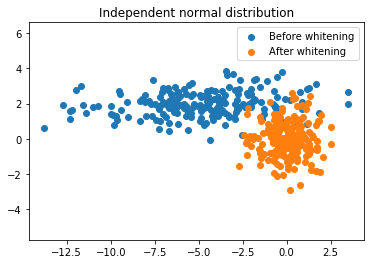

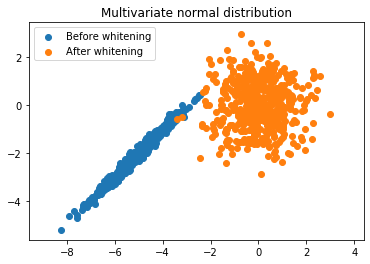

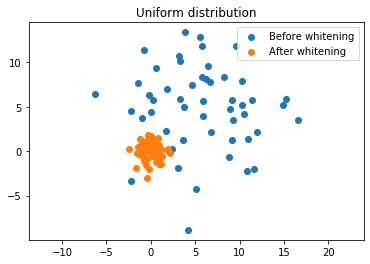

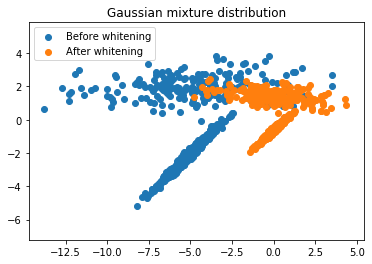

In [5]:
X_diag_normal = np.random.multivariate_normal([-5, 2.], [[10, 0], [0, 0.5]], size=200)
X_multivariate_normal = np.random.multivariate_normal([-5, -2], [[1, 0.99], [0.99, 1]], size=500)
X_uniform = np.random.normal(6, 5, size=(50, 2))
X_gmm = np.concatenate((X_multivariate_normal, X_diag_normal), axis=0)
    
utils.scatter_with_whiten(X_diag_normal, whiten, name="Independent normal distribution")
utils.scatter_with_whiten(X_multivariate_normal, whiten, name="Multivariate normal distribution")
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution")
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution")

## Standaryzacja a whitening
W pierwszym notebooku implementowaliśmy następującą funkcję, która wykonuje zadanie podobne do whiteningu:

$$ f(x_{ij}) = \frac{x_{ij} - \mu_j}{\sigma_j} $$

Tę funkcję nazwijmy **standaryzacją**. Czym zatem różni się standaryzacja od whiteningu? Czy nie wystarczy znormalizować kolumn i zamiast tego musimy wykonywać znacznie bardziej kosztowną operację liczenia i odwracania macierzy kowariancji?

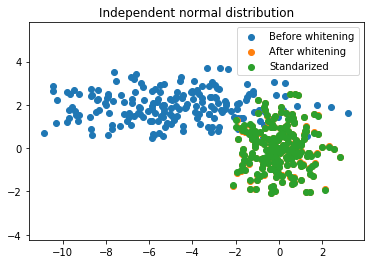

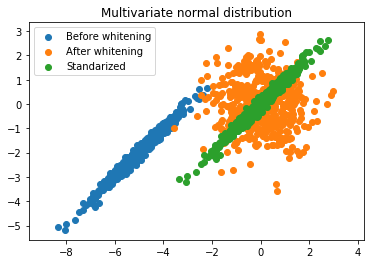

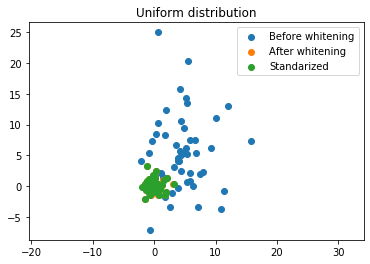

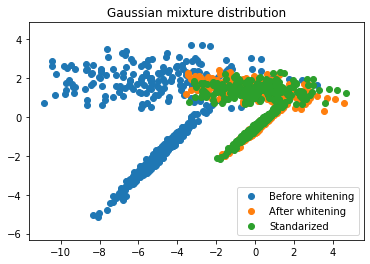

In [150]:
utils.scatter_with_whiten(X_diag_normal, whiten, name="Independent normal distribution", standarize=True)
utils.scatter_with_whiten(X_multivariate_normal, whiten, name="Multivariate normal distribution", standarize=True)
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution", standarize=True)
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution", standarize=True)

# Zadanie 3 (2 pkt.)
Należy:
1. Wysamplować $10000$ przykładów z rozkładu normalnego $\mathcal{N}(\mu, \sigma)$. **Należy wybrać niestandardowe parametry**, tzn. $\mu \neq 0$ oraz $\sigma \neq 1$.
2. Następnie należy policzyć, jaki procent wylosowanych przykładów, znajduje się od środka w odległości większej niż: 
    * $1\sigma$ (tzn. $|x - \mu| > 1\sigma$)
    * $2\sigma$ (tzn. $|x - \mu| > 2\sigma$)
    * $3\sigma$ (tzn. $|x - \mu| > 3\sigma$)
    
3. Wypisać wszystkie przykłady, które wpadają do ostatniej kategorii (tzn. są oddalone o co najmniej $3\sigma$ od średniej).

In [13]:
loc = 6 # średnia wybranego rozkładu normalnego
scale = 5 # odchylenie standardowe wybranego rozkładu normalnego
X = np.random.normal(loc,scale,size=(10000,1))
#s1=0
#s2=0
#s3=0
#for i in X:
   # if abs(i - loc) > scale:
   #     s1=s1+1
  #  if abs(i - loc) > 2*scale:
  #      s2=s2+1
  #  if abs(i - loc) > 3*scale:
  #      s3=s3+1
#s1p = s1/100
#s2p = s2/100
#s3p = s3/100
#print("Przykłady oddalone o więcej niż 1 sigma:" , s1p ,"%")
#print("Przykłady oddalone o więcej niż 2 sigma:", s2p , "%")
#print("Przykłady oddalone o więcej niż 3 sigma:", s3p , "%")




10000


Przykłady oddalone o więcej niż 1 sigma: 30.8 %
Przykłady oddalone o więcej niż 2 sigma: 4.61 %
Przykłady oddalone o więcej niż 3 sigma: 0.23 %
[3.22829308]
[16.75854095]
[17.03519306]
[16.10313033]
[16.69711469]
[16.94411111]
[2.34253627]
[2.45437057]
[16.17914332]
[3.78076692]
[16.02744342]
[17.00463942]
[3.99832468]
[16.56104918]
[3.80671281]
[16.83116864]
[3.67415245]
[3.55295605]
[16.37938745]
[16.18781413]
[16.09635519]
[16.53290331]
[3.60897131]


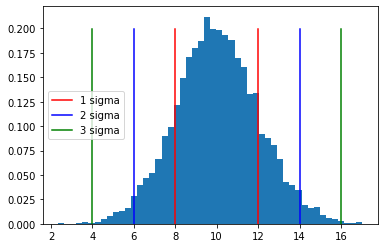

In [9]:
# Podpunkt 1: Wysamplować 10000 przykładów z rozkładu normalnego
loc = 10 # średnia wybranego rozkładu normalnego
scale = 2 # odchylenie standardowe wybranego rozkładu normalnego
X = np.random.normal(loc,scale,size=(10000,1))

# Podpunkt 2: Wyliczyć i wypisać procent 
s1=0
s2=0
s3=0


for i in X:
    if abs(i - loc) > scale:
        s1=s1+1
    if abs(i - loc) > 2*scale:
        s2=s2+1
    if abs(i - loc) > 3*scale:
        s3=s3+1
        

    
     
s1p = s1/100
s2p = s2/100
s3p = s3/100
print("Przykłady oddalone o więcej niż 1 sigma:" , s1p ,"%")
print("Przykłady oddalone o więcej niż 2 sigma:", s2p , "%")
print("Przykłady oddalone o więcej niż 3 sigma:", s3p , "%")
    
# Podpunkt 3: Wypisać elementy, które są oddalone od średniej o 3 sigma.
for i in X:
    if abs(i - loc) > 3*scale:
        print(i)
# Trochę wizualizacji

utils.visualize_normal_dist(X, loc, scale)

# Zadanie 4 (2 pkt.)
Mamy zbiór przykładów $X$ o wymiarch `[N, 1]` wysamplowanych z jednowymiarowego rozkładu normalnego o nieznanych parametrach. Należy znaleźć takie parametry $\mu$ oraz $\sigma$, które z największym prawdopodobieństwem były wykorzystane do wylosowania przykładów $X$, tzn: $
\DeclareMathOperator*{\argmax}{arg\,max}
\argmax_{\mu, \sigma} P(\mu, \sigma | X)
$.

Dla uproszczenia zapisów oznaczmy sobie: $\theta = \{ \mu, \sigma \}$. Od teraz będziemy używać $\theta$ żeby oznaczyć parametry modelu - tzn. te wartości, które model optymalizuje, żeby zminimalizować funkcję kosztu.

Do rozwiązania zadania trzeba wykonać następujące kroki:
1. Zaimplementować funkcję negative log likelihood dla rozkładu normalnego:
\begin{split}
L(X, \theta) &= -\sum_{i=1}^N \ln \mathcal{N}(x_i | \mu, \sigma) \\
&=  \frac{N}{2} \ln(2 \pi) + \frac{N}{2} \ln \sigma^2 + \frac{1}{2 \sigma^2} \sum_{i=1}^N (x_i - \mu)^2
\end{split}
2. Zaimplementować funkcję liczącą gradient negative log likelihoodu po parametrach:
$$\nabla_\theta L(X, \theta) = \begin{bmatrix} \frac{dL}{d\mu} & \frac{dL}{d\sigma}\ \end{bmatrix}. $$

    Wzory na pochodne będące częścią gradientu:
    $$ \frac{dL}{d\mu}=\frac{1}{\sigma^{2}}\sum_{i=1}^{N}(\mu - x_i) $$
    $$ \frac{dL}{d\sigma}=\frac{N}{\sigma}-\frac{1}{\sigma^3}\sum_{i=1}^{N}(x_{i}-\mu)^{2} $$

3. Zminimalizować $L$, korzystając z metody spadku gradientu.

Zauważmy, że optymalizacja działa tutaj dokładnie tak samo jak w poprzednim notebooku - jedyna różnica polega na tym, że tutaj optymalizujemy po wektorze $\theta$ zamiast po wektorze $v$ (kwestia zmiany nazwy) i mamy nieco inną funkcję kosztu (negative log likelihood zamiast mean square error).

In [17]:
from scipy.stats import norm

def gradient_descent(grad_fn, dataset, learning_rate=0.2, num_steps=100):
    current_v = np.array([np.random.normal(4), np.random.normal(2)])
    current_v[current_v < 0.2] = 0.2
    all_v = [current_v]
    
    for step_idx in range(num_steps):
        # Poniższe dwie linijki proszę uzupełnić rozwiązaniami z poprzedniego notebooka.
        grad = grad_fn(dataset,current_v)
        current_v = current_v - learning_rate*grad
        all_v += [current_v]
        
        if np.linalg.norm(all_v[-1] - all_v[-2]) < 1e-5:
            break
        
    final_grad = grad
    final_v = current_v
    all_v = np.array(all_v)
    return final_v, final_grad, all_v

def neg_log_likelihood(X, theta):
    mu, sigma = theta
    
    return (X.size/2)*np.log(2*np.pi) + (X.size/2)*np.log(sigma**2) + (1/(2 * sigma**2)) * np.sum((X - mu)**2)
    
def grad_neg_log_likelihood(X, theta):
    mu, sigma = theta
    # Rozwiązanie można oczywiście pisać w wielu linijkach, nie trzeba w jednej.
    deriv_mu = ((1/(sigma**2)) * np.sum((mu - X)))
    deriv_sigma = ((X.size/sigma) - (1/(sigma**3)) * np.sum((X - mu)**2))
    return np.array([deriv_mu, deriv_sigma])

In [22]:
# Asserty
checker.check_neg_log_likelihood(neg_log_likelihood)
checker.check_grad_neg_log_likelihood(grad_neg_log_likelihood)

Final mu: -0.07. Final sigma: 1.00
True mu: 0.00. True sigma: 1.00


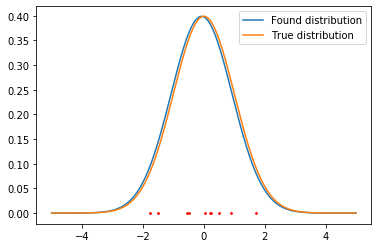

Final mu: 0.00. Final sigma: 1.00
True mu: 0.00. True sigma: 1.00


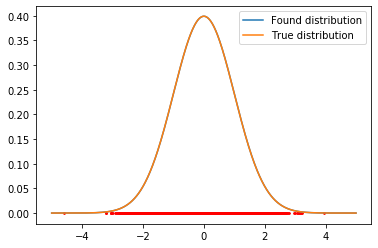

Final mu: -0.00. Final sigma: 1.96
True mu: 0.00. True sigma: 2.00


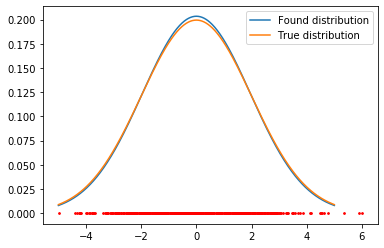

Final mu: -1.99. Final sigma: 0.32
True mu: -2.00. True sigma: 0.30


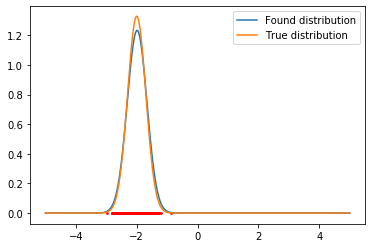

In [21]:
def generate_and_fit(mu, sigma, samples_num):
    dataset = np.random.normal(mu, sigma, size=(samples_num, 1))
    (final_mu, final_sigma), _, _ = gradient_descent(
        grad_neg_log_likelihood,
        dataset,
        learning_rate=5e-2 / dataset.shape[0],
        num_steps=20000
    )

    print("Final mu: {:.2f}. Final sigma: {:.2f}".format(final_mu, final_sigma))
    print("True mu: {:.2f}. True sigma: {:.2f}".format(mu, sigma))

    X = np.linspace(-5, 5, num=1000)
    grad_Y = norm.pdf(X, loc=final_mu, scale=final_sigma)
    true_Y = norm.pdf(X, loc=mu, scale=sigma)
    
    plt.plot(X, grad_Y, label="Found distribution")
    plt.plot(X, true_Y, label="True distribution")
    plt.scatter(dataset, np.zeros_like(dataset), color="red", s=3.)
    plt.legend()
    plt.show()

generate_and_fit(mu=0, sigma=1, samples_num=10)
generate_and_fit(mu=0, sigma=1, samples_num=5000)
generate_and_fit(mu=0, sigma=2, samples_num=500)
generate_and_fit(mu=-2, sigma=0.3, samples_num=500)

Final grad value for neg_log_likelihood: [0.09617747 0.00019765]
[-1.96216113  0.74666291]


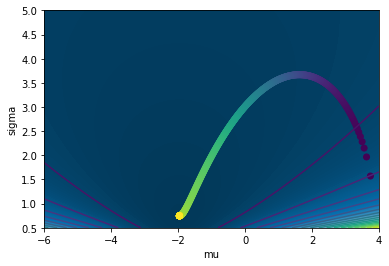

In [27]:
dataset = np.random.normal(loc=-2, scale=0.75, size=(500, 1))
linspaces = (
    np.linspace(-6, 4, num=200),
    np.linspace(0.5, 5, num=100),
)
fig, ax = plt.subplots()
final_theta = utils.plot_gradient_steps_2d(
    ax, dataset, gradient_descent,
    grad_neg_log_likelihood, neg_log_likelihood,
    num_steps=20000, learning_rate=5e-2 / dataset.shape[0],
    linspaces=linspaces
)
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
print(final_theta)

## Miniwykład: Dlaczego maksymalizowanie log likelihoodu pomaga?
Wyobraźmy sobie, że mamy zbiór danych $X = (x_1, x_2, \ldots, x_n)$, co do których wiemy, że pochodzą z rozkładu normalnego o nieznanych parametrach $\mu^*$ oraz $\sigma^*$. W jaki sposób możemy znaleźć parametry, z których te dane pochodzą z największym prawdopodobieństwem? W zapisie rachunku prawdopodobieństwa chcielibyśmy znaleźć:

$$
\DeclareMathOperator*{\argmax}{arg\,max}
\argmax_{\mu, \sigma} P(\mu, \sigma | X) =  \argmax_{\theta} P(\theta | X),
$$
gdzie zapisaliśmy $\theta = \{ \mu, \sigma \}$.


### Twierdzenie Bayesa
Niestety nie znamy rozkładu prawdopodobieństwa $P(\theta | X)$. Możemy natomiast wykorzystać twierdzenie Bayesa:
$$
P(\theta | X) = \frac{P(X | \theta)P(\theta)}{P(X)}
$$

Poszczególne elementy tego wzoru przyjęło się nazywać konkretnymi terminami:
* $P(\theta)$ to **prior** - wyraża naszą wiedzę na temat tego, jakie może być prawdziwe $\theta$ jeszcze **przed** zobaczeniem danych $X$.
* $P(X | \theta)$ to **likelihood** - mówi o tym, jakie jest prawdopodobieństwo wygenerowania danych $X$, jeśli nasz rozkład ma parametry $\theta$.
* $P(X)$ to **model evidence** albo **marginal likelihood** - często jest rozpisywane z definicji prawdopodobieństwa brzegowego jako $P(X) = \int P(X | \theta) P(\theta) d\theta $.
* $P(\theta | X)$ to **posterior** - wyraża naszą wiedzę na temat temat tego, jakie może być prawdziwe $\theta$ już **po** zobaczeniu danych $X$.


### Maximum A Posteriori
W idealnej sytuacji chcielibyśmy wprost policzyć całe $P(\theta | X)$. Niestety ze względu na całkę w mianowniku $P(X)$ jest często niepoliczalne. Szczęśliwie, kiedy interesuje nas tylko maksymalna wartość tego prawdopodoieństwa, możemy ten mianownik pominąć:
$$ 
\argmax_\theta P(\theta | X) = \argmax_\theta P(X | \theta)P(\theta)
$$

Otrzymane w ten sposób parametry nazywane są często $\theta_{\mathrm{MAP}}$, od Maxium A Posteriori.

### Maximum Likelihood Estimation
Jeśli założymy, że uważamy każde $\theta$ za równie prawdopodobne, to możemy pominąć również $P(\theta)$ i zająć się maksymalizowaniem samego likelihoodu. Szczęśliwie, potrafimy go policzyć:
$$ P(X | \theta) = P(x_1 | \theta)P(x_2 | \theta) \ldots P(x_n | \theta) = \Pi_{i=1}^N P(x_i | \theta) $$.

Jako że wiemy, że każdy $x \in X$ pochodzi z rozkładu normalnego, to wtedy
$$ P(x_i | \theta) = P(x_i | \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \mathrm{exp}(\frac{-(x_i-\mu)^2}{2\sigma^2}) $$

Parametry maksymalizujące likelihood oznaczamy $\theta_{\mathrm{MLE}}$, czyli Maximum Likelihood Estimation.


### Log-likelihood
Czas na ostatni trik - praca z iloczynem $\Pi_{i=1}^N P(x_i | \theta)$ jest nieprzyjemna matematycznie, a przy implementacji z powodów numerycznych może on zostać zaokrąglony do 0. Zauważmy teraz, że:
$$\argmax_\theta P(X | \theta) = \argmax_\theta \log P(X | \theta),$$ jako że logarytm to funkcja rosnąca.

Dzięki logarytmowi iloczyn zamienia się w sumę:
$$ \log P(X | \theta) = \log \Pi_{i=1}^N P(x_i | \theta) = \sum_{i=1}^N \log P(x_i | \theta),$$
tę wartość nazywamy log-likelihoodem.

### Podsumowanie
Jeżeli chcemy znaleźć parametry $\theta$, które najlepiej wyjaśniają punkty $X$ i nie mamy żadnej uprzedniej wiedzy na temat $\theta$, to wystarczy, że znajdziemy:
$$ \theta_{\mathrm{MLE}} = \argmax\sum_{i=1}^N \log P(x_i | \theta)$$


Kilka przydatnych linków:

## Dygresje
* W przypadku rozkładu normalnego MLE można znaleźć analitycznie, przyrównując pochodne do zera.
* MLE można optymalizować także na różne sposoby, np. techniką Expectation-Maximization. Z uproszczoną jej wersją spotkamy się na kolejnych ćwiczeniach przy okazji algorytmu k-mean.